<a href="https://colab.research.google.com/github/frita515/DefectBag/blob/main/demo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import os
import glob
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
from image_tools.sizes import resize_and_crop
drive.mount('/content/gdrive')

# change to working tensorflow directory on the drive
%cd '/content/gdrive/My Drive/project'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/project


In [ ]:
pip install image-tools

In [ ]:
def detect_blob(img,prefix):
  if prefix == badstn:
    keypoints= blob_detector(img,False,0.1)
  else:
   keypoints= blob_detector(img,True,0.9)
  return keypoints

In [ ]:
path = "/defect"
prefix="badk"
img=[]
#filename=os.path.join('{}'.format(prefix),"badk.bmp")
for image_file in enumerate(glob.iglob(os.path.join(path,'/{}'.format(prefix),"*.bmp"))):
    newarr=np.append(arr,FGD_ex(image_file),axis=1)

In [ ]:
import imutils
from google.colab.patches import cv2_imshow
def preprocess(image, width, height):
    # Grab the dimensions of the image, then initialize the padding values
    (h, w) = image.shape[:2]

    # If the width is greater than the height then resize along the width
    if w > h:
        image = imutils.resize(image, width=width)
    # Otherwise, the height is greater than the width so resize along the height
    else:
        image = imutils.resize(image, height=height)

    # Determine the padding values for the width and height to obtain the target dimensions
    pad_w = int((width - image.shape[1]) / 2.0)
    pad_h = int((height - image.shape[0]) / 2.0)

    # Pad the image then apply one more resizing to handle any rounding issues
    image = cv2.copyMakeBorder(image, pad_h, pad_h, pad_w, pad_w, cv2.BORDER_REPLICATE)
    image = cv2.resize(image, (width, height))

    # Return the pre-processed image
    return image
img=cv2.imread('good.bmp')
imp = preprocess(img,680,970)

error: ignored

In [ ]:
img=cv2.imread('good.bmp')

#img1=cv2.imread('badstn/badstn.bmp')
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (20,20,900,900)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
imp=preprocess(img,680,950)
cv2_imshow(img)


error: ignored

In [ ]:
def blob_detector(image,cir_bool,minCon):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    params = cv2.SimpleBlobDetector_Params()

    # Define thresholds
    #Can define thresholdStep. See documentation.
    params.minThreshold = 0
    params.maxThreshold = 255

    # Filter by Area.
    params.filterByArea = True
    params.minArea = 50
    params.maxArea = 10000

    # Filter by Color (black=0)
    params.filterByColor = True  #Set true for cast_iron as we'll be detecting black regions
    params.blobColor = 0

    # Filter by Circularity
    params.filterByCircularity = cir_bool
    params.minCircularity = 0.2
    params.maxCircularity = 1

    # Filter by Convexity
    params.filterByConvexity = True
    params.minConvexity = minCon
    params.maxConvexity = 1

    # Filter by InertiaRatio
    params.filterByInertia = True
    params.minInertiaRatio = 0
    params.maxInertiaRatio = 1

    # Distance Between Blobs
    params.minDistBetweenBlobs = 0

    # Setup the detector with parameters
    detector = cv2.SimpleBlobDetector_create(params)

    # Detect blobs
    keypoints = detector.detect(gray)


    return keypoints

keypoints= blob_detector(img,True,0.9)
print("Number of blobs detected are : ", len(keypoints))
keypoints[2].pt[0]

Number of blobs detected are :  7


390.2994689941406

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
params = cv2.SimpleBlobDetector_Params()

# Define thresholds
#Can define thresholdStep. See documentation.
params.minThreshold = 0
params.maxThreshold = 255

# Filter by Area.
params.filterByArea = True
params.minArea = 50
params.maxArea = 10000

# Filter by Color (black=0)
params.filterByColor = True  #Set true for cast_iron as we'll be detecting black regions
params.blobColor = 0

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.2
params.maxCircularity = 1

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.9
params.maxConvexity = 1

# Filter by InertiaRatio
params.filterByInertia = True
params.minInertiaRatio = 0
params.maxInertiaRatio = 1

# Distance Between Blobs
params.minDistBetweenBlobs = 0

# Setup the detector with parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(gray)

print("Number of blobs detected are : ", len(keypoints))



Number of blobs detected are :  7


In [ ]:
roi=[]

for i in range(len(keypoints)):
    x = keypoints[i].pt[0] #i is the index of the blob you want to get the position
    y = keypoints[i].pt[1]
    s= keypoints[i].size
    x=int(x)-12
    y=int(y)-12
    x1=x+28
    y1=y+28
    ro=gray[y:y1,x:x1]
    roi.append(ro)
    #cv2_imshow(roi)
    #roi.shape

cv2_imshow(roi[5])
arr1 = np.asarray(roi)
arr1.shape


(7, 28, 28)

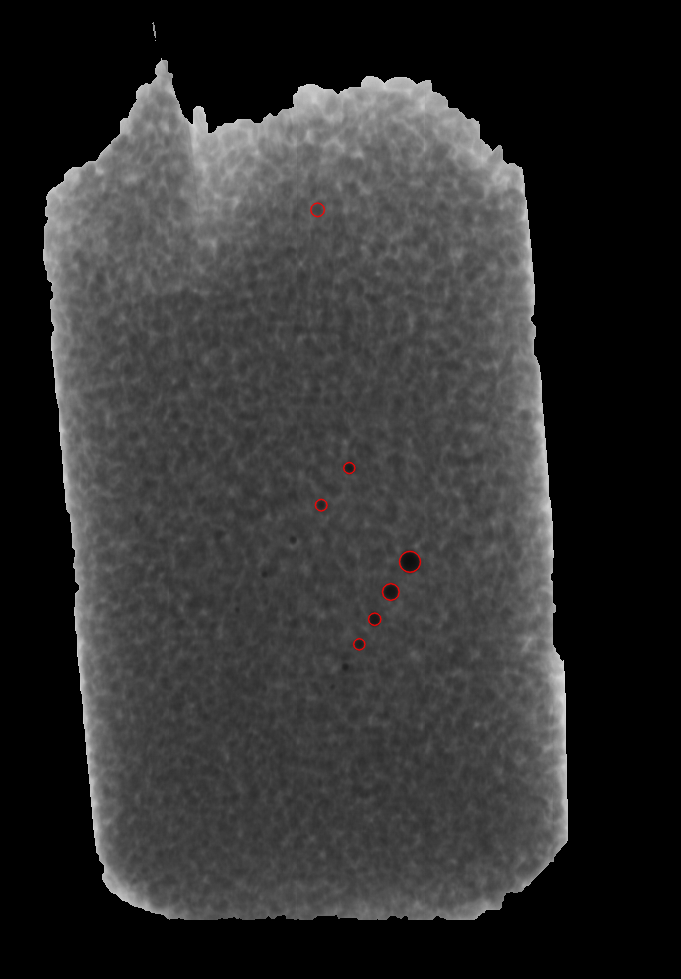

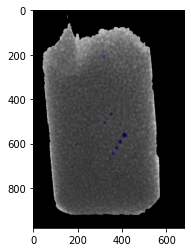

In [ ]:
from google.colab.patches import cv2_imshow
img_with_blobs = cv2.drawKeypoints(gray, keypoints,np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_with_blobs)
#cv2_imshow( img_with_blobs)
cv2.waitKey(0)
cv2.destroyAllWindows()